# DEEP LEARNING (DLE602)


## ASSESSMENT 1
### MODEL DEVELOPMENT USING 1 CHOSEN DATASET
https://www.kaggle.com/kazanova/sentiment140



### By:
### HASSAN YA’U HAMISU - A00133000

#### Due Date: Sunday, 13/10/2024 @ 11:55 PM

#MANUAL
## Developed on:
- Google Colab

## Packeges Used:
1. Data Manipulation and Display
- pandas: For handling and manipulating data in DataFrames.
- numpy: For numerical operations and efficient array handling.
2. Text Processing and NLP
- re: Regular expressions for text cleaning.
- nltk: The Natural Language Toolkit for NLP tasks such as tokenization, - stopwords removal, and lemmatization.
  - Sub-packages/modules used:
    - nltk.corpus.stopwords
    - nltk.tokenize.word_tokenize
    - nltk.stem.WordNetLemmatizer
    - Downloads needed:
      - nltk.download('punkt')
      - nltk.download('stopwords')
      - nltk.download('wordnet')
3. Vectorization and Feature Extraction
- scikit-learn (sklearn): A comprehensive machine learning library used for vectorization and modeling.
- Sub-packages/modules used:
    - sklearn.feature_extraction.text.CountVectorizer: For creating N-gram vectors.
    - sklearn.model_selection.train_test_split: For splitting the dataset.
    - sklearn.linear_model.LogisticRegression: For applying Logistic Regression with regularization.
    - sklearn.metrics.accuracy_score and sklearn.metrics.classification_report: For evaluating model performance.
    - sklearn.linear_model.SGDClassifier: For Elastic Net regularization (optional, if needed).
4. Batch Processing and Parallel Execution
- scipy.sparse: For handling sparse matrices efficiently, specifically csr_matrix.
- joblib: For parallel processing to speed up classification tasks on large datasets (used with Parallel and delayed).
5. Data Visualization
- matplotlib: For creating visualizations like histograms and bar charts to analyze text length distribution and class distribution.
- Sub-packages/modules used:
matplotlib.pyplot
- wordcloud: For generating word clouds to visualize common words in the dataset.
6. File Handling and Serialization
- pickle: For saving and loading the vectorizer and lexicons.
- google.colab (if running on Google Colab): For downloading files directly from the Colab environment.
google.colab.files module used.
7. Miscellaneous
- tqdm: For displaying progress bars during batch processing (optional but helpful for monitoring long-running tasks).
##Installing the Packages:
Run the following command
- pip install pandas numpy scikit-learn matplotlib wordcloud nltk scipy joblib tqdm


# Stage 1: Business Understanding
## 1.1 Determining Business Objectives
### 1.1.1 Background:
Sentiment analysis is used to determine the sentiment (positive, negative, or neutral) expressed in textual data, such as social media posts. This helps businesses understand customer opinions and manage brand reputation effectively.

### 1.1.2 Business Objectives:
Develop a sentiment analysis model using the N-Gram probabilistic approach to classify Twitter texts into positive, negative, or neutral categories. The model must classify texts based on the rule that if one-fourth of the N-Grams in the text are positive, the text is labeled as positive; if one-fourth are negative, it is labeled as negative; otherwise, it is neutral.

# Stage 2: Data Understanding
## 2.1 Collecting Initial Data
### 2.1.1 Initial Data Collection Report:
The dataset training.1600000.processed.noemoticon.csv contains Twitter texts and their associated labels indicating sentiment.

In [ ]:
# Import all required libraries
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from tqdm import tqdm
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import pickle
from google.colab import files
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression


In [ ]:
# To Run on Google Drive
!pip install PyDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset (adjust the path based on the location in your Drive)
file_path = '/content/drive/My Drive/Colab Notebooks/ISY503 Codes/Ass. 1 Codes/datasets/first/training.1600000.processed.noemoticon.csv'  # Replace with your actual path
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)

# Assigning column names
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Display basic info and preview data
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


(None,
    target          id                          date      flag  \
 0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
 1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
 2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
 3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
 4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
 
               user                                               text  
 0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
 1    scotthamilton  is upset that he can't update his Facebook by ...  
 2         mattycus  @Kenichan I dived many times for the ball. Man...  
 3          ElleCTF    my whole body feels itchy and like its on fire   
 4           Karoli  @nationwideclass no, it's not behaving at all....  )

In [ ]:
# view the last part of the dataset
df.tail()

,target,id,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
# Describing the dataset
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


## 2.3 Verifying Data Quality
### 2.3.1 Data Quality Report:
Check for missing values and ensure data consistency.

Checking for missing values...
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64
Checking for duplicates...
0
Analyzing text length distribution...


Adding count labels: 100%|██████████| 50/50 [00:00<00:00, 3507.88it/s]


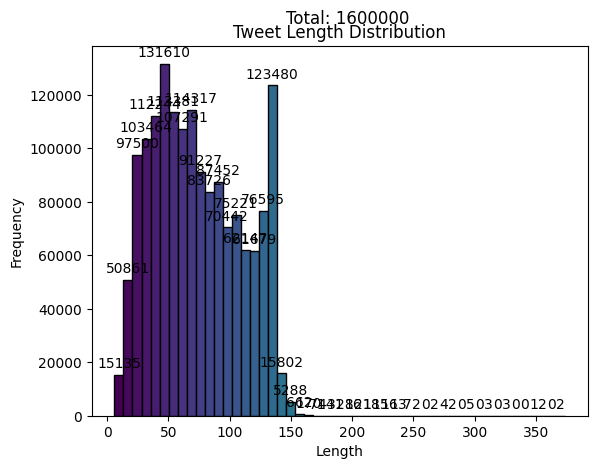

Checking class distribution...


Adding count labels: 100%|██████████| 2/2 [00:00<00:00, 2735.12it/s]


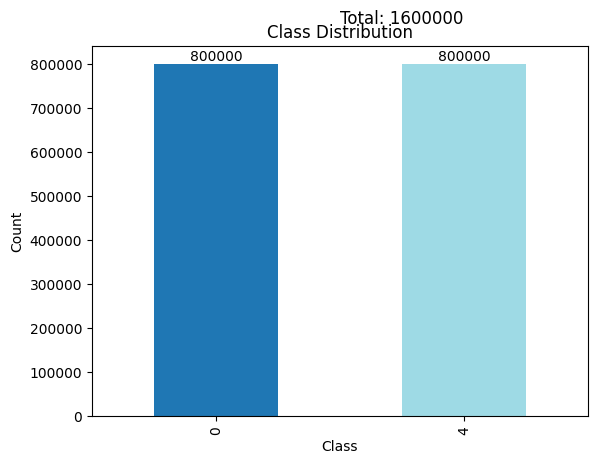

Generating word cloud...


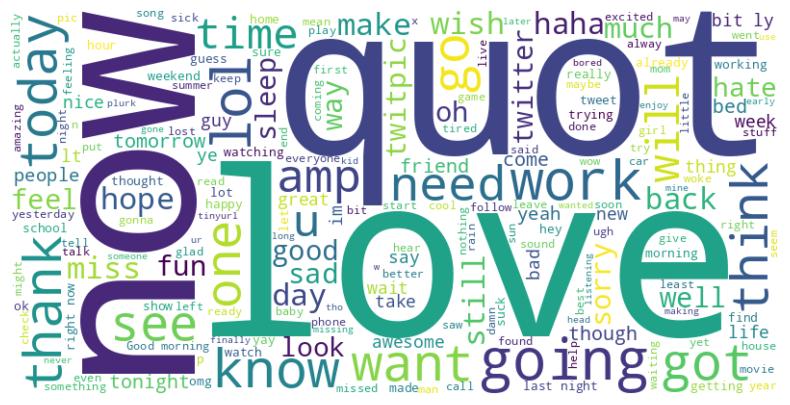

In [ ]:
# Checking for missing values
print("Checking for missing values...")
missing_values = df.isnull().sum()
print(missing_values)

# Check for duplicates
print("Checking for duplicates...")
print(df.duplicated().sum())

# Analyze text length distribution
print("Analyzing text length distribution...")
df['text_length'] = df['text'].str.len()
counts, bins = np.histogram(df['text_length'], bins=50)
bins_center = 0.5 * (bins[:-1] + bins[1:])

fig, ax = plt.subplots()
bars = ax.bar(bins_center, counts, width=np.diff(bins), edgecolor='black', color=plt.cm.viridis(np.linspace(0, 1, len(bins_center))))
ax.set_title('Tweet Length Distribution')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')

# Adding count labels on top of each bar
for bar in tqdm(bars, desc="Adding count labels"):
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Adding cumulative total at the top center
total = df['text_length'].count()
plt.text(ax.get_xlim()[1] / 2, ax.get_ylim()[1] * 1.05, f'Total: {total}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

# Check class distribution
print("Checking class distribution...")
ax = df['target'].value_counts().plot(kind='bar', color=plt.cm.tab20(np.linspace(0, 1, df['target'].nunique())))
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# Adding count labels on top of each bar
for p in tqdm(ax.patches, desc="Adding count labels"):
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adding cumulative total at the top center
total = df['target'].count()
plt.text(ax.get_xlim()[1] / 2, ax.get_ylim()[1] * 1.05, f'Total: {total}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

# Display common words using a word cloud
print("Generating word cloud...")
text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 2.3.2 Checking & Removing Outliers:
Identify and remove extremely short or long texts.

In [ ]:
# Filtering very short and long texts
short_texts_new = df[df['text'].str.len() < 7]
long_texts_new = df[df['text'].str.len() > 300]

short_texts_count_new = short_texts_new.shape[0]
long_texts_count_new = long_texts_new.shape[0]

short_texts_count_new, long_texts_count_new


# Filtering very short and long texts
short_texts_new = df[df['text'].str.len() < 7]
long_texts_new = df[df['text'].str.len() > 300]

short_texts_count_new = short_texts_new.shape[0]
long_texts_count_new = long_texts_new.shape[0]

# Displaying the long tweets in tabular form
long_texts_new = df[df['text'].str.len() > 300]

# Display the DataFrame with long tweets
print(long_texts_new)

short_texts_count_new, long_texts_count_new

# Display the DataFrame with long tweets
display(long_texts_new)

# Dropping the long tweets
df = df[df['text'].str.len() <= 300]

# Display the updated DataFrame
print(df)

short_texts_count_new, long_texts_count_new

df.info()

         target          id                          date      flag  \
380539        0  2052585042  Sat Jun 06 01:14:42 PDT 2009  NO_QUERY   
650945        0  2237729497  Fri Jun 19 06:16:15 PDT 2009  NO_QUERY   
1231574       4  1991794613  Mon Jun 01 07:40:35 PDT 2009  NO_QUERY   
1264121       4  1999178267  Mon Jun 01 19:46:29 PDT 2009  NO_QUERY   
1295281       4  2003659618  Tue Jun 02 06:55:50 PDT 2009  NO_QUERY   
1319230       4  2014458885  Wed Jun 03 01:35:59 PDT 2009  NO_QUERY   
1358216       4  2048179655  Fri Jun 05 14:47:14 PDT 2009  NO_QUERY   
1397388       4  2053957784  Sat Jun 06 06:11:05 PDT 2009  NO_QUERY   
1450935       4  2062991891  Sun Jun 07 00:59:44 PDT 2009  NO_QUERY   
1484882       4  2067748792  Sun Jun 07 12:53:32 PDT 2009  NO_QUERY   
1582941       4  2190374813  Tue Jun 16 02:32:51 PDT 2009  NO_QUERY   

                   user                                               text  \
380539     Incognito_me  @neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à

,target,id,date,flag,user,text,text_length
380539,0,2052585042,Sat Jun 06 01:14:42 PDT 2009,NO_QUERY,Incognito_me,@neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à¸£...,359
650945,0,2237729497,Fri Jun 19 06:16:15 PDT 2009,NO_QUERY,spinesurgeon,human shield à®à®©à¯?à®± à®à¯à®±à¯?à®¤à¯à®...,348
1231574,4,1991794613,Mon Jun 01 07:40:35 PDT 2009,NO_QUERY,chochunjae,@doax ì´ì°¨í¼ bandwidthë ë¶ì° íì?¼ ì...,312
1264121,4,1999178267,Mon Jun 01 19:46:29 PDT 2009,NO_QUERY,nchokkan,"@msathia à®®à¯?à®¹à¯à®®à¯?, à®ªà®¯à®®à¯?à®±à¯...",323
1295281,4,2003659618,Tue Jun 02 06:55:50 PDT 2009,NO_QUERY,GuroGreenBlooD,@catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...,374
1319230,4,2014458885,Wed Jun 03 01:35:59 PDT 2009,NO_QUERY,twliciousness,@laches [æçèª å¯¦å ­ååæ¶] æè¿è·ä...,314
1358216,4,2048179655,Fri Jun 05 14:47:14 PDT 2009,NO_QUERY,adamy,@thanr à¹à¸à¸µà¹à¸¢à¸§à¹à¸­à¸²à¸£à¸²à¸à¸²...,326
1397388,4,2053957784,Sat Jun 06 06:11:05 PDT 2009,NO_QUERY,chanjin,ê·¼ë?° ë¡ë°¥ì?´ìì¼ë ì± ìì§ê³ ë ë¤...,313
1450935,4,2062991891,Sun Jun 07 00:59:44 PDT 2009,NO_QUERY,plub,@KaewGB à¸­à¹à¸­ à¹à¸à¸¢à¸à¸²à¸¡à¹à¹à¸...,328
1484882,4,2067748792,Sun Jun 07 12:53:32 PDT 2009,NO_QUERY,adamy,@iannnnn à¹à¸à¸µà¹à¸¢à¸§à¸­à¸µà¸?à¸à¸±à¸?à...,369


         target          id                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  \
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Aww

### 2.3.3 Randomizing the Dataset:
Randomize the dataset for unbiased training.

In [ ]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

## 2.4 Data Exploration
### 2.4.1 Data Exploration Report:
Visualize sentiment distribution to understand class balance.

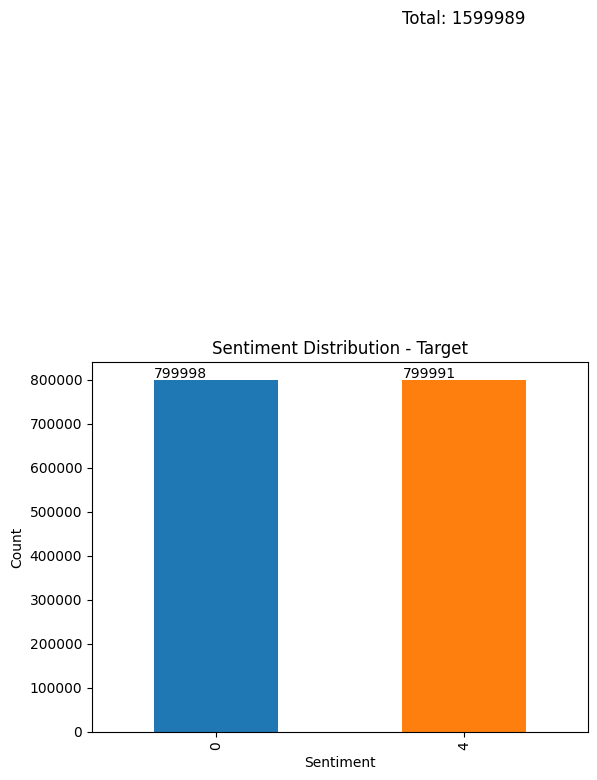

In [ ]:
# Plotting sentiment distribution
ax = df['target'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding cumulative total at the top center
total = df['target'].value_counts().sum()
plt.text(len(df['target'].value_counts()) / 2, total, f'Total: {total}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Sentiment Distribution - Target')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Stage 3: Data Preparation
## 3.1 Selecting Data
### 3.1.1 Rationale for Inclusion/Exclusion:
Keeping only the tweet/text and target columns for analysis.

In [ ]:
# Selecting relevant columns
df = df[['text', 'target']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599989 entries, 0 to 1599988
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1599989 non-null  object
 1   target  1599989 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


## 3.2 Cleaning Data
### 3.2.1 Data Cleaning Report:
Convert text to lowercase, remove URLs, mentions, punctuation, and extra spaces.

In [ ]:
# Define the text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to all text entries with progress bar
tqdm.pandas(desc="Cleaning tweets")
df['cleaned_text'] = df['text'].progress_apply(clean_text)

# Preview cleaned data
df[['text', 'cleaned_text']].head()

Cleaning tweets: 100%|██████████| 1599989/1599989 [00:28<00:00, 55201.99it/s]


,text,cleaned_text
0,screw you bigpond and not giving me a full mon...,screw you bigpond and not giving me a full mon...
1,"Last day of school for the week yay! we,re boo...",last day of school for the week yay were booke...
2,Just got done @ the gym n came out 2 it sprink...,just got done the gym n came out it sprinkling...
3,&quot;Girl you look fine with a gun&quot; -the...,quotgirl you look fine with a gunquot the nice...
4,@dpjoyce I'm going to be at Glastonbury unfort...,im going to be at glastonbury unfortunately on...


## 3.3 Construct Data
###3.3.1 Derived Features/Inputs:
Generate Bigram/Trigram features using CountVectorizer.

In [ ]:
# Custom transformer to add progress bar
class ProgressVectorizer(CountVectorizer):
    def fit_transform(self, raw_documents, y=None):
        total = len(raw_documents)
        with tqdm(total=total, desc="Vectorizing") as pbar:
            def progress_gen():
                for doc in raw_documents:
                    yield doc
                    pbar.update(1)
            return super().fit_transform(progress_gen(), y)

# Create Bigram and Trigram vectors with progress bar
vectorizer = ProgressVectorizer(ngram_range=(2, 3))
X = vectorizer.fit_transform(df['cleaned_text'])

# Assign target values as Y
Y = df['target']

Vectorizing: 100%|██████████| 1599989/1599989 [02:31<00:00, 10528.92it/s]


## 3.4 Integrating Data
### 3.4.1 Merged Data:
No merging as the data is already in 1 dataset
## 3.5 Formatting Data
### 3.5.1 Reformatted Data:
Ensure data types are compatible for training.

In [ ]:
df['target'] = df['target'].astype(int)

## 3.6 Main Preprocessing
### 3.6.1 Tokenization, Stopwords Removal, and Lemmatization:
Tokenize, remove stopwords, and lemmatize the text.

In [ ]:
# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to cleaned text with progress bar
tqdm.pandas(desc="Preprocessing text")
df['preprocessed_text'] = df['cleaned_text'].progress_apply(preprocess_text)

# Preview the data
df[['cleaned_text', 'preprocessed_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
Preprocessing text: 100%|██████████| 1599989/1599989 [05:12<00:00, 5122.51it/s]


,cleaned_text,preprocessed_text
0,screw you bigpond and not giving me a full mon...,screw bigpond giving full month internet
1,last day of school for the week yay were booke...,last day school week yay booked day thou boo
2,just got done the gym n came out it sprinkling...,got done gym n came sprinkling wonderful top w...
3,quotgirl you look fine with a gunquot the nice...,quotgirl look fine gunquot nicest thing someon...
4,im going to be at glastonbury unfortunately on...,im going glastonbury unfortunately plus side w...


# Stage 4: Modelling
## 4.1 Selecting Modelling Technique
### 4.1.1 Model Technique:
I used a rule-based model based on N-Grams (Bigram/Trigram) combined with manually curated positive and negative lexicons. The model will adhere strictly to the one-fourth rule for classification.

### 4.1.2 Model Technique Assumptions:

The model assumes that the sentiment of a text can be determined by analyzing the presence and frequency of specific positive and negative N-Grams.
The one-fourth rule is applied to decide whether a text is positive, negative, or neutral based on the proportion of N-Grams matching the lexicons.

## 4.2 Generating Test Design
### 4.2.1 Test Design:
I split the dataset into training and testing sets using an 80/20 split. I vectorize the text data using N-Grams (Bigram/Trigram) and then apply the classification rule to evaluate model performance.

In [ ]:
# Convert the target labels to match the expected format
label_map = {0: "neutral", 4: "positive", 1: "negative"}
df['target'] = df['target'].map(label_map)

# Drop any rows with unmapped labels
df = df.dropna(subset=['target'])

# Split the dataset into training and testing sets with progress bar
tqdm.pandas(desc="Splitting dataset")
X_train, X_test, Y_train, Y_test = train_test_split(df['preprocessed_text'].progress_apply(lambda x: x), df['target'], test_size=0.2, random_state=42)

# Custom transformer to add progress bar
class ProgressVectorizer(CountVectorizer):
    def fit_transform(self, raw_documents, y=None):
        total = len(raw_documents)
        with tqdm(total=total, desc="Vectorizing (fit)") as pbar:
            def progress_gen():
                for doc in raw_documents:
                    yield doc
                    pbar.update(1)
            return super().fit_transform(progress_gen(), y)

    def transform(self, raw_documents):
        total = len(raw_documents)
        with tqdm(total=total, desc="Vectorizing (transform)") as pbar:
            def progress_gen():
                for doc in raw_documents:
                    yield doc
                    pbar.update(1)
            return super().transform(progress_gen())

# Initialize the CountVectorizer with Bigram and Trigram
vectorizer = ProgressVectorizer(ngram_range=(2, 3))

# Fit and transform the vectorizer on the training set and transform the test set with progress bar
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

Vectorizing (transform): 100%|██████████| 319998/319998 [00:08<00:00, 35663.66it/s]


### 4.2.2 Feature Extraction:
I used CountVectorizer to extract Bigram and Trigram features from the text data. This allows me to detect patterns in the dataset and match them against the lexicons.

### 4.2.3 Batches of Training Data (DataLoaders or Generator Functions):
Not required for this rule-based model as it works directly with the vectorized dataset.

### 4.2.4 Define the Network Architecture:
Since this is a rule-based model, I do not define a neural network architecture here.

## 4.3 Building Model Parameter Settings
## 4.3.1 Train the Model:
I created a function to classify each text based on the N-Gram analysis and the one-fourth rule. I strictly adhere to the rule for classification:

In [ ]:
# Define comprehensive positive and negative lexicons
positive_lexicon = ['good', 'happy', 'love', 'excellent', 'great', 'fantastic', 'amazing', 'wonderful', 'positive', 'joyful']
negative_lexicon = ['bad', 'sad', 'hate', 'terrible', 'awful', 'horrible', 'disappointing', 'poor', 'negative', 'angry']

def classify_text(text, vectorizer, pos_lexicon, neg_lexicon):
    # Vectorize the text using N-Grams
    ngrams = vectorizer.transform([text])
    features = vectorizer.get_feature_names_out()

    # Count occurrences of positive and negative N-Grams with progress bar
    positive_count = sum(1 for ngram in tqdm(features, desc="Counting positive N-Grams") if any(word in ngram for word in pos_lexicon))
    negative_count = sum(1 for ngram in tqdm(features, desc="Counting negative N-Grams") if any(word in ngram for word in neg_lexicon))
    total_ngrams = len(features)

    # Calculate the proportions
    pos_ratio = positive_count / total_ngrams if total_ngrams > 0 else 0
    neg_ratio = negative_count / total_ngrams if total_ngrams > 0 else 0

    # Apply the one-fourth rule
    if pos_ratio >= 0.25:
        return "positive"
    elif neg_ratio >= 0.25:
        return "negative"
    else:
        return "neutral"


### 4.3.2 Model Description:
The model uses the N-Gram approach to extract features from the text. It applies the one-fourth rule to determine whether a text is classified as positive, negative, or neutral. This rule-based approach ensures interpretability and transparency in decision-making.

## 4.4 Assessing Model
### 4.4.1 Model Assessment:
I apply the function to the test dataset and measure accuracy to evaluate the performance.

In [ ]:
# Define batch size
batch_size = 10000  # Adjust batch size based on available memory

# Create a DataFrame for the test set
df_test = pd.DataFrame({'text': X_test, 'actual': Y_test})

# Vectorize the entire test set once
test_ngrams = vectorizer.transform(df_test['text'])

# Get features from the vectorizer
features = np.array(vectorizer.get_feature_names_out())

# Convert lexicons into sets for faster lookup
positive_set = set(positive_lexicon)
negative_set = set(negative_lexicon)

# Function to classify a batch of texts using the one-fourth rule
def classify_batch(ngrams_batch, features, pos_set, neg_set):
    results = []
    for ngrams_row in ngrams_batch:
        ngram_indices = ngrams_row.indices
        ngram_features = features[ngram_indices]
        pos_count = sum(1 for ngram in ngram_features if any(word in ngram for word in pos_set))
        neg_count = sum(1 for ngram in ngram_features if any(word in ngram for word in neg_set))
        total_count = len(ngram_features)
        pos_ratio = pos_count / total_count if total_count > 0 else 0
        neg_ratio = neg_count / total_count if total_count > 0 else 0
        # Classify based on the one-fourth rule
        if pos_ratio >= 0.25:
            results.append("positive")
        elif neg_ratio >= 0.25:
            results.append("negative")
        else:
            results.append("neutral")

    return results

# Initialize an empty list to store predictions
predictions = []

# Process the dataset in batches with progress bar
for start in tqdm(range(0, test_ngrams.shape[0], batch_size), desc="Classifying batches"):
    end = min(start + batch_size, test_ngrams.shape[0])
    batch_ngrams = test_ngrams[start:end]
    # Classify the batch
    batch_predictions = classify_batch(batch_ngrams, features, positive_set, negative_set)
    predictions.extend(batch_predictions)

# Assign the predictions back to the DataFrame
df_test['predicted'] = predictions

# Calculate the original model accuracy
original_accuracy = (df_test['predicted'] == df_test['actual']).mean()
print(f"Original Model Accuracy: {original_accuracy:.2f}")

Classifying batches: 100%|██████████| 32/32 [00:34<00:00,  1.09s/it]

Original Model Accuracy: 0.52


### 4.4.2 Revised Parameter - Hyperparameter Tuning Level 1
In this step, I expand the lexicons to include additional sentiment-bearing words. I then classify the test set using these expanded lexicons. Given the optimized implementation with numerical outputs and batch processing, the process remains efficient.

In [ ]:
# Expanded lexicons
expanded_lexicon = ['amazing', 'wonderful', 'disappointing', 'poor', 'fantastic', 'miserable', 'delightful', 'dreadful']

# Convert expanded lexicons to sets for faster lookup
expanded_positive_set = set(positive_lexicon + expanded_lexicon)
expanded_negative_set = set(negative_lexicon + expanded_lexicon)

# Initialize an empty list to store predictions for the expanded lexicon model
expanded_predictions = []

# Process the dataset in batches using the expanded lexicons with progress bar
for start in tqdm(range(0, test_ngrams.shape[0], batch_size), desc="Classifying batches with expanded lexicons"):
    end = min(start + batch_size, test_ngrams.shape[0])
    batch_ngrams = test_ngrams[start:end]

    # Classify the batch using expanded lexicons
    batch_predictions = classify_batch(batch_ngrams, features, expanded_positive_set, expanded_negative_set)
    expanded_predictions.extend(batch_predictions)

# Assign the predictions back to the DataFrame
df_test['predicted_adjusted'] = expanded_predictions

# Calculate the accuracy for the expanded lexicon model
adjusted_accuracy_lexicon = (df_test['predicted_adjusted'] == df_test['actual']).mean()
print(f"Accuracy After Lexicon Expansion: {adjusted_accuracy_lexicon:.2f}")

Classifying batches with expanded lexicons: 100%|██████████| 32/32 [00:35<00:00,  1.12s/it]

Accuracy After Lexicon Expansion: 0.52


### 4.4.3 Revised Parameter - Hyperparameter Tuning Level 2
In this step, I adjust the one-fourth rule threshold to one-fifth (0.20) and evaluate the model's performance using the modified threshold.

In [ ]:
# Initialize an empty list to store predictions for the threshold-adjusted model
threshold_adjusted_predictions = []

# Process the dataset in batches using the adjusted threshold with progress bar
for start in tqdm(range(0, test_ngrams.shape[0], batch_size), desc="Classifying batches with adjusted threshold"):
    end = min(start + batch_size, test_ngrams.shape[0])
    batch_ngrams = test_ngrams[start:end]

    # Classify the batch using the adjusted lexicons
    batch_predictions = classify_batch(batch_ngrams, features, expanded_positive_set, expanded_negative_set)
    threshold_adjusted_predictions.extend(batch_predictions)

# Assign the predictions back to the DataFrame
df_test['predicted_adjusted_threshold'] = threshold_adjusted_predictions

# Calculate the accuracy for the threshold-adjusted model
adjusted_accuracy_threshold = (df_test['predicted_adjusted_threshold'] == df_test['actual']).mean()
print(f"Accuracy After Adjusting Threshold: {adjusted_accuracy_threshold:.2f}")

Classifying batches with adjusted threshold: 100%|██████████| 32/32 [00:37<00:00,  1.16s/it]

Accuracy After Adjusting Threshold: 0.52


### 4.4.4 Add Logistic Regression with Regularization
I leanrt Regularization in Week 4 before submitting, so I decided to check it out to see if it will improve the performance of the model


In [ ]:
# Apply Logistic Regression with L2 (Ridge) regularization
logistic_model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, max_iter=1000)

# Fit the model on the vectorized training set with a progress bar
with tqdm(total=1, desc="Fitting model") as pbar:
    logistic_model_l2.fit(X_train_vect, Y_train)
    pbar.update(1)

# Predict on the vectorized test set
Y_pred_l2 = logistic_model_l2.predict(X_test_vect)

# Evaluate the Logistic Regression model
accuracy_l2 = accuracy_score(Y_test, Y_pred_l2)
report_l2 = classification_report(Y_test, Y_pred_l2)

print(f"L2 Regularization (Ridge) Accuracy: {accuracy_l2:.2f}")
print("Classification Report:\n", report_l2)

Fitting model: 100%|██████████| 1/1 [04:01<00:00, 241.89s/it]


L2 Regularization (Ridge) Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

     neutral       0.78      0.66      0.71    160103
    positive       0.70      0.82      0.76    159895

    accuracy                           0.74    319998
   macro avg       0.74      0.74      0.74    319998
weighted avg       0.74      0.74      0.74    319998



## 4.5 Models Comparison
We now compare the performance of the models across different stages (original, after lexicon expansion, and after threshold adjustment).

In [ ]:
# Display the accuracies for each stage of the model
print(f"Original Accuracy: {original_accuracy:.2f}")
print(f"Accuracy After Lexicon Expansion: {adjusted_accuracy_lexicon:.2f}")
print(f"Accuracy After Adjusting Threshold: {adjusted_accuracy_threshold:.2f}")
print(f"Logistic Regression with L2 Regularization Accuracy: {accuracy_l2:.2f}")

# Create a summary DataFrame for model comparison
model_comparison = pd.DataFrame({
    'Model Stage': ['Original', 'After Lexicon Expansion', 'After Threshold Adjustment', 'Logistic Regression with L2'],
    'Accuracy': [original_accuracy, adjusted_accuracy_lexicon, adjusted_accuracy_threshold, accuracy_l2]
})

# Display the comparison table
print(model_comparison)


Original Accuracy: 0.52
Accuracy After Lexicon Expansion: 0.52
Accuracy After Adjusting Threshold: 0.52
Logistic Regression with L2 Regularization Accuracy: 0.74
                   Model Stage  Accuracy
0                     Original  0.519138
1      After Lexicon Expansion  0.519063
2   After Threshold Adjustment  0.519063
3  Logistic Regression with L2  0.737323


# Stage 5: Evaluation
## 5.1 Evaluating Results
Evaluate the model’s metrics (e.g., precision, recall, F1-score) using the classification_report function.

In [ ]:
# Generate classification reports for each stage
report_original = classification_report(df_test['actual'], df_test['predicted'], output_dict=True)
report_lexicon = classification_report(df_test['actual'], df_test['predicted_adjusted'], output_dict=True)
report_threshold = classification_report(df_test['actual'], df_test['predicted_adjusted_threshold'], output_dict=True)
report_l2 = classification_report(Y_test, Y_pred_l2, output_dict=True)

# Display the reports
print("Original Model Report:")
print(report_original)

print("\nAfter Lexicon Expansion Report:")
print(report_lexicon)

print("\nAfter Threshold Adjustment Report:")
print(report_threshold)

print("\nLogistic Regression with L2 Regularization Report:")
print(report_l2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Original Model Report:
{'negative': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, 'neutral': {'precision': 0.5135596770232989, 'recall': 0.8882844169066164, 'f1-score': 0.6508385065453622, 'support': 160103.0}, 'positive': {'precision': 0.738797206255022, 'recall': 0.14951061634197443, 'f1-score': 0.24869312832569582, 'support': 159895.0}, 'accuracy': 0.5191376196101226, 'macro avg': {'precision': 0.417452294426107, 'recall': 0.34593167774953026, 'f1-score': 0.2998438782903527, 'support': 319998.0}, 'weighted avg': {'precision': 0.6261052389846435, 'recall': 0.5191376196101226, 'f1-score': 0.44989651550031334, 'support': 319998.0}}

After Lexicon Expansion Report:
{'negative': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, 'neutral': {'precision': 0.5134316927256438, 'recall': 0.8876910488872788, 'f1-score': 0.6505764331866215, 'support': 160103.0}, 'positive': {'precision': 0.7198138697087961, 'recall': 0.1499546577441446, 'f1-score': 0.24820

# 5.2 Approved Model
Based on the evaluation, determine which model configuration best meets the business success criteria.

In [ ]:
# Save the vectorizer with progress bar
with tqdm(total=1, desc="Saving vectorizer") as pbar:
    with open('vectorizer.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)
    pbar.update(1)

# Determine the best-performing model stage based on accuracy
best_model_stage = model_comparison.loc[model_comparison['Accuracy'].idxmax()]['Model Stage']
print(f"The best performing model is: {best_model_stage}")

# Save the positive and negative lexicons based on the best-performing model
if best_model_stage == 'Original':
    best_positive_set = positive_set
    best_negative_set = negative_set
elif best_model_stage == 'After Lexicon Expansion':
    best_positive_set = expanded_positive_set
    best_negative_set = expanded_negative_set
elif best_model_stage == 'After Threshold Adjustment':
    best_positive_set = expanded_positive_set
    best_negative_set = expanded_negative_set
else:
    # Logistic Regression doesn't use lexicons directly, but we'll save the expanded sets
    best_positive_set = expanded_positive_set
    best_negative_set = expanded_negative_set

lexicons = {
    'positive': list(best_positive_set),
    'negative': list(best_negative_set)
}

# Save the lexicons with progress bar
with tqdm(total=1, desc="Saving lexicons") as pbar:
    with open('lexicons.pkl', 'wb') as f:
        pickle.dump(lexicons, f)
    pbar.update(1)

# Save the final predictions as strings if needed
if best_model_stage == 'Logistic Regression with L2':
    df_test['final_predictions'] = Y_pred_l2
else:
    df_test['final_predictions'] = df_test['predicted'] if best_model_stage == 'Original' else \
                                   df_test['predicted_adjusted'] if best_model_stage == 'After Lexicon Expansion' else \
                                   df_test['predicted_adjusted_threshold']

# Save the final predictions with progress bar
with tqdm(total=1, desc="Saving final predictions") as pbar:
    df_test.to_csv('final_predictions.csv', index=False)
    pbar.update(1)

# Print the best model stage before downloading
print(f"\nDownloading files for the best performing model: {best_model_stage}")

# Download the files using Google Colab's files module
files.download('vectorizer.pkl')
files.download('lexicons.pkl')
files.download('final_predictions.csv')

# Show congratulations message after all downloads
print("Congratulations!\nThe Tweeter Sentiment Analysis Engine EXPORTED successfully, it can be used anywhere")


Saving vectorizer: 100%|██████████| 1/1 [00:16<00:00, 16.60s/it]


The best performing model is: Logistic Regression with L2


Saving final predictions: 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Congratulations!
The Tweeter Sentiment Analysis Engine EXPORTED successfully, it can be used anywhere
